In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hledání kořenů

Naprogramujte hledání kořenů metodou půlení intervalu.

Najděte kořen sin(x) mezi 3 a 4 metodou půlení intervalu

In [2]:
a, b = 3, 4
f = np.sin

In [3]:
def bisect(f, a, b, maxiter=53):
    # ukol: definujte tělo této funkce
    if np.sign(f(a))*np.sign(f(b)) >= 0:
        raise(ValueError("Function sign must differ at a and b"))
    
    for i in range(maxiter):
        m = (a+b)/2.
        fm = f(m)
        if m in [a, b] or fm == 0:
            # floating point tolerance reached or exact solution found
            return m
        
        if fm*np.sign(f(a)) < 0:
            b = m
        elif fm*np.sign(f(b)) < 0:
            a = m
    
    return m

In [4]:
bisect(f, 3, 4)

3.141592653589793

### Newtonova metoda

In [5]:
def newton(f, df, a):
    for i in range(10):
        a_new = a - f(a)/df(a)
        if a_new == a:
            return a
        a = a_new

In [6]:
df = np.cos

In [7]:
newton(f, df, 4.8), newton(f, df, 4.)

(15.707963267948966, 3.141592653589793)

# Minimalizace

Úkol č. 1: naprogramujte hledání minima metoda zlatého řezu (dělení intervalu).

Najděte minimum funkce `cos(x)` v intervalu `[2, 4]`. Sledujte rychlost konvergence - tedy přesnost určení polohy minima `xmin` a funkční hodnoty `cos(xmin)` v minimu v závislosti na počtu iterací. S jakou přesností lze tyto parametry určit?

Poté najděte minimum funkce `1 + (x-0.1)**4` na intervalu `[-1, 1]` a obdobným způsobem zhodnoťte přenost určení minima.

In [44]:
def golden_min(f, a, b, tol=1e-5):
    iphi = 2/(np.sqrt(5) + 1) # 0.618...
    approximations = [[a, b]]
    
    c = b - (b - a) * iphi
    d = a + (b - a) * iphi
    while np.abs(b - a) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
            
        approximations.append([a,b])
        
        c = b - (b - a) * iphi
        d = a + (b - a) * iphi
        
    return (b + a) / 2, np.array(approximations)
    

In [45]:
f = np.cos
xmin, approx = golden_min(f, 3, 4, tol=1e-14)

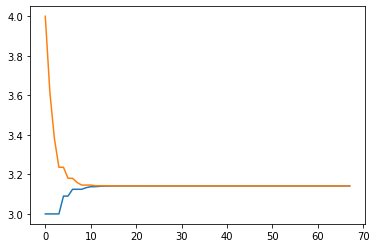

In [46]:
plt.plot(np.arange(approx.shape[0]), approx[:,0])
plt.plot(np.arange(approx.shape[0]), approx[:,1])

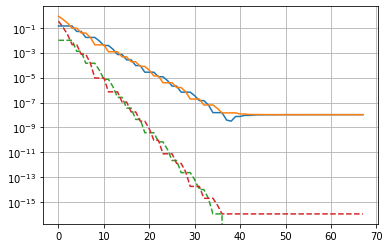

In [12]:
plt.plot(np.arange(approx.shape[0]), np.abs(approx[:,0]-np.pi))
plt.plot(np.arange(approx.shape[0]), np.abs(approx[:,1]-np.pi))
plt.plot(np.arange(approx.shape[0]), np.abs(f(approx[:,0])+1), "--")
plt.plot(np.arange(approx.shape[0]), np.abs(f(approx[:,1])+1), "--")
plt.grid()
plt.gca().set_yscale("log")

In [13]:
xmin - np.pi # ~sqrt(eps)

1.0536708838770892e-08

In [59]:
f = lambda x: (x-0.1)**4
true_min = 0.1


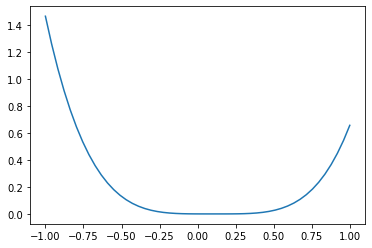

In [60]:
x = np.linspace(-1, 1)
plt.plot(x, f(x))

In [61]:
xmin, approx = golden_min(f, -1, 1, tol=1e-14)

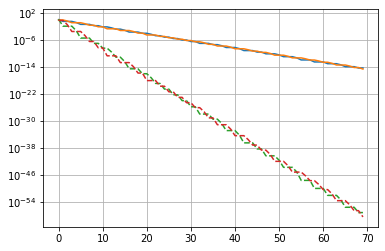

In [62]:
plt.plot(np.arange(approx.shape[0]), np.abs(approx[:,0]-true_min))
plt.plot(np.arange(approx.shape[0]), np.abs(approx[:,1]-true_min))
plt.plot(np.arange(approx.shape[0]), np.abs(f(approx[:,0])-f(true_min)), "--")
plt.plot(np.arange(approx.shape[0]), np.abs(f(approx[:,1])-f(true_min)), "--")
plt.grid()
plt.gca().set_yscale("log")

In [63]:
xmin

0.09999999999999866

In [ ]:
Newtonova metoda

Ukázka Newtonovy metody


In [51]:
def newton_min(f, df, ddf, a):
    for i in range(10):
        a_new = a - df(a)/ddf(a)
        if a_new == a:
            if ddf(a) > 0:
                return a
            else:
                raise(RuntimeError("Method did not converge to minimum"))
        a = a_new

In [52]:
def f(x): return x**2 + x
def df(x): return 2*x + 1
def ddf(x): return 2

In [53]:
newton_min(f, df, ddf, 1)

-0.5

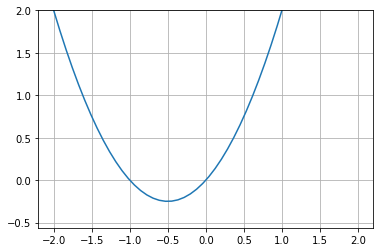

In [54]:
x = np.linspace(-2, 2)
plt.plot(x, f(x))
plt.ylim(ymax=2)
plt.grid()